In [1]:
import cv2
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import linalg as LA
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import csv

In [ ]:
# Loading the image data
df=pd.read_csv('/content/drive/MyDrive/test_csv/train_celeb.csv', sep=',',header=None)
x = df.values

df=pd.read_csv('/content/drive/MyDrive/test_csv/labels_celeb.csv', sep=',',header=None)
y = df.values
y = y.ravel()

x = np.array(x)

print(x)

[[ 21  24  25 ...  36  25  24]
 [ 51  47  46 ... 208 210 210]
 [ 47  32  37 ...  26  25  24]
 ...
 [250 249 248 ...  28  27  27]
 [ 61  61  61 ... 138 133 132]
 [ 54  53  51 ...  47  41  39]]


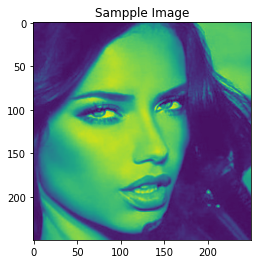

In [ ]:
# Displaying an average image
img2 = np.reshape(x[0,:], (250, 250))
img2 = img2.astype('uint8')

plt.imshow(img2)
plt.title('Sampple Image')
plt.show()

All the images x1,x2,...,xM are converted into vectors and stored in a matrix x where there are M images present

Feature wise mean is calculated for N^2 features

And then, we calculate the average vector for each face and store it in a matrix of size N^2 x M

In [ ]:
# Calculating the mean of each feature
def feature_mean(data):
  mean = []
  for i in range(data.shape[1]):
    sum = 0
    for j in range(data.shape[0]):
      sum += data[j][i]
    sum = sum / data.shape[0]
    mean.append(sum)
  return mean

mu = feature_mean(x)

# Calculating the average images
def average_matrix(data,mean):
  A = []
  for i in range(data.shape[0]):
    a = []
    for j in range(data.shape[1]):
      temp = data[i][j] - mu[j]
      a.append(temp)
    A.append(a)

  A = np.array(A)
  return A.transpose()

A = average_matrix(x,mu)

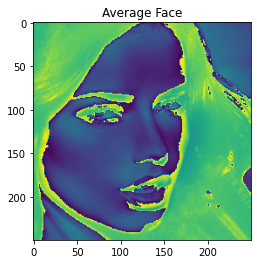

In [ ]:
# Displaying an average image
img1 = np.reshape(A[:,0], (250, 250))
img1 = img1.astype('uint8')

plt.imshow(img1)
plt.title('Average Face')
plt.show()

We compute the covariance matrix and get the eigen values and corresponsing eigen vectors

We than find the eigenfaces by considering the eigenvectors corresponding to the largest eigen values and store them in a matrix ef

We than calculate the weights associated with the eigenfaces required to represent each face and store the weight vectors in a matrix w

In [ ]:
# Computing the covariance matrix
C = np.dot(np.transpose(A),A)

# Calculating the eigen values and eigen vectors of the covariance matrix
lamda, v = LA.eig(C)
u = np.dot(A,v)

# The eigenfaces corresponding to the largest eigenvalues
ef = np.delete(u,np.s_[1900:2337],axis=1)

# Weights associated with each image
w = np.dot(x,ef)

In [ ]:
# Saving the weight vectors into a csv file for future reference
with open("/content/drive/MyDrive/test_csv/weights_celeb.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(w)

# Saving the eigenface vectors into a csv file for future reference
with open("/content/drive/MyDrive/test_csv/eigenfaces_celeb.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(ef)

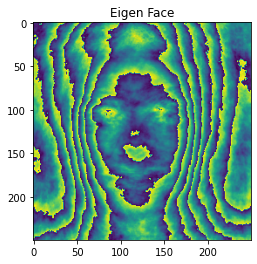

In [ ]:
# Displaying an eigen image
img1 = np.reshape(ef[:,0], (250, 250))
img1 = img1.astype('uint8')

plt.imshow(img1)
plt.title('Eigen Face')
plt.show()

In [ ]:
# Loading a random test image
img = cv2.imread('/content/drive/MyDrive/test/Natalie Dormer130_159.jpg')
# Converting the RGB image to grayscale
im = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Convering the image to a numpy array and than vectorizing the array
im = np.array(im)
test = im.ravel()

# Calculating the weights
w_p = np.dot(test,ef)

# Finding the weights that best fit the image 
e = []
for i in range(w.shape[0]):
  err = 0
  for j in range(w.shape[1]):
    err = err + (w_p[j]-w[i][j])**2
  e.append(math.sqrt(err))

# Getting the predicted output
print(y[e.index(min(e))])

Nadia Hilker.jpg


In [ ]:
# Loading a random test image
img = cv2.imread('/content/drive/MyDrive/test/Morgan Freeman216_3090.jpg')
# Converting the RGB image to grayscale
im = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Convering the image to a numpy array and than vectorizing the array
im = np.array(im)
test = im.ravel()

# Calculating the weights
w_p = np.dot(test,ef)

# Finding the weights that best fit the image 
e = []
for i in range(w.shape[0]):
  err = 0
  for j in range(w.shape[1]):
    err = err + (w_p[j]-w[i][j])**2
  e.append(math.sqrt(err))

# Getting the predicted output
print(y[e.index(min(e))])

Morgan Freeman.jpg


In [ ]:
# Loading a random test image
img = cv2.imread('/content/drive/MyDrive/test/Alex Lawther74_136.jpg')
# Converting the RGB image to grayscale
im = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Convering the image to a numpy array and than vectorizing the array
im = np.array(im)
test = im.ravel()

# Calculating the weights
w_p = np.dot(test,ef)

# Finding the weights that best fit the image 
e = []
for i in range(w.shape[0]):
  err = 0
  for j in range(w.shape[1]):
    err = err + (w_p[j]-w[i][j])**2
  e.append(math.sqrt(err))

# Getting the predicted output
print(y[e.index(min(e))])

(1900,)
Alex Lawther.jpg


In [2]:
# Loading the training data
df=pd.read_csv('/content/drive/MyDrive/test_csv/train_celeb.csv', sep=',',header=None)
x = df.values

# Loading the actual celeb weights
df=pd.read_csv('/content/drive/MyDrive/test_csv/labels_celeb.csv', sep=',',header=None)
y = df.values
y = y.ravel()

# Loading the eigenfaces
df=pd.read_csv('/content/drive/MyDrive/test_csv/eigenfaces_celeb.csv', sep=',',header=None)
ef=df.values

# Loading weights
df=pd.read_csv('/content/drive/MyDrive/test_csv/weights_celeb.csv', sep=',',header=None)
w=df.values

# Loading the trues values for test data
df=pd.read_csv('/content/drive/MyDrive/test_csv/test_labels_celeb.csv', sep=',',header=None)
y_true = df.values
y_true = y_true.ravel()

# Loding the test data
df=pd.read_csv('/content/drive/MyDrive/test_csv/test_celeb.csv', sep=',',header=None)
x_test = df.values
x_test = np.array(x_test)

In [3]:
# Testing the images of the testing dataset

y_pred = []
# Calculating the weights
w_p = np.dot(x_test,ef)

for k in range(len(y_true)):
  # Finding the weights that best fit each images in testing set
  e = []
  for i in range(w.shape[0]):
    err = 0
    for j in range(w.shape[1]):
      err = err + (w_p[k][j]-w[i][j])**2
    e.append(math.sqrt(err))
  y_pred.append(y[e.index(min(e))]) # Finding the predicted label

# Finding the accuracy by comparing the predicted and true labels
count = 0
for i in range(len(y_true)):
  if(y_pred[i].lower()==y_true[i].lower()):
    count += 1

print("Accuracy: "+str(count/len(y_true)*100))

Accuracy: 40.35087719298245
